# <span style="color:green"> Tesi</span>

In [2]:
#import evverything needed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

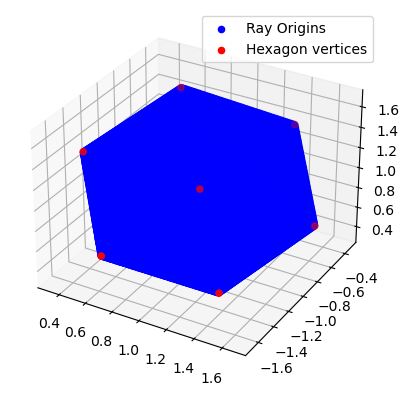

In [7]:
# Load data from the file
data1 = np.loadtxt("data/RayOrigins.dat", delimiter=',')
x1, y1, z1 = data1[:, 0], data1[:, 1], data1[:, 2]

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the points

ax.scatter(x1, -y1, z1, c='blue', label='Ray Origins')


data2 = np.loadtxt("data/H.dat", delimiter=',')
x2, y2, z2 = data2[:, 0], data2[:, 1], data2[:, 2]

# Scatter plot the new points
ax.scatter(x2, -y2, z2, c='red', label='Hexagon vertices')

# Add a legend
ax.legend()

# Show the plot
plt.show()
